<br>

#### Imports

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

<br>

#### Reading in Data

In [2]:
df_EI = pd.read_csv('data/EI.csv', parse_dates=['UTC']).rename(columns={'UTC':'datetime'})
df_EI.head()

,datetime,biomass,coal,demand,gas,hydro,nuclear,solar,wind,dutch,french,irish,pumped_storage
0,2009-01-01 00:00:00,0.0,17.650,38.329,11.900,0.246,6.973,0.0,0.148,0.0,1.977,-0.161,-0.404
1,2009-01-01 00:30:00,0.0,17.770,38.461,12.031,0.245,6.968,0.0,0.157,0.0,1.977,-0.160,-0.527
2,2009-01-01 01:00:00,0.0,18.070,37.986,11.754,0.246,6.970,0.0,0.147,0.0,1.977,-0.160,-1.018
3,2009-01-01 01:30:00,0.0,18.022,36.864,11.162,0.246,6.969,0.0,0.148,0.0,1.746,-0.160,-1.269
4,2009-01-01 02:00:00,0.0,17.998,36.180,10.812,0.246,6.960,0.0,0.160,0.0,1.730,-0.160,-1.566


<br>

#### Demand Load Curve

In [3]:
s_demand = df_EI.set_index('datetime')['demand']
s_demand.head()

datetime
2009-01-01 00:00:00    38.329
2009-01-01 00:30:00    38.461
2009-01-01 01:00:00    37.986
2009-01-01 01:30:00    36.864
2009-01-01 02:00:00    36.180
Name: demand, dtype: float64

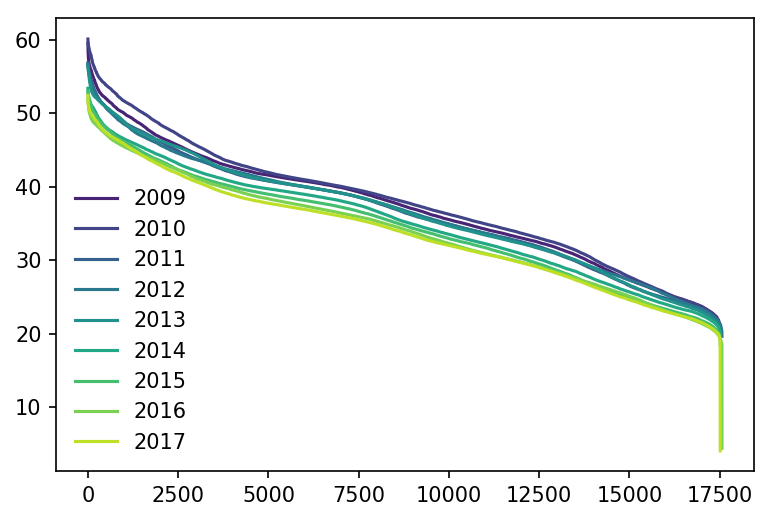

In [8]:
def sort_series(s, year):
    s_sorted = (s
                .copy()
                [str(year)]
                .sort_values(ascending=False)
                .reset_index(drop=True)
               )
    return s_sorted

years = list(range(2009, 2018))

color_list = sns.color_palette("viridis", len(years))
cmap = dict(zip(years, color_list))

plt.figure(dpi=150)
for year in years:
    s_sorted_demand = sort_series(s_demand, year)
    plt.plot(s_sorted_demand.index, s_sorted_demand, label=f'{year}', color=cmap[year])
    
plt.legend(frameon=False)

<br>

Should look into doing load duration curves for individual generators - http://energynumbers.info/uk-offshore-wind-capacity-factors

<br>

<br>

#### Plotting Individual Fuel Load Curves

In [5]:
fuels = ['coal', 'gas', 'nuclear', 'pumped_storage', 'solar', 'wind']
df_EI.columns

Index(['datetime', 'biomass', 'coal', 'demand', 'gas', 'hydro', 'nuclear',
       'solar', 'wind', 'dutch', 'french', 'irish', 'pumped_storage'],
      dtype='object')

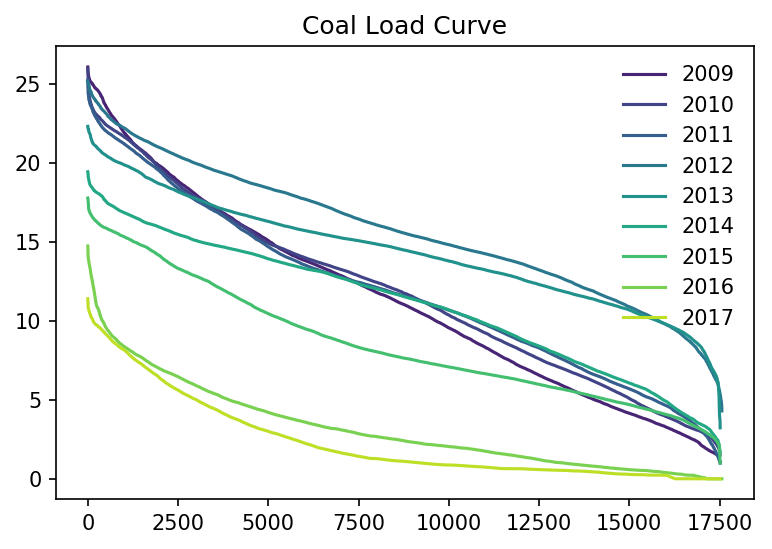

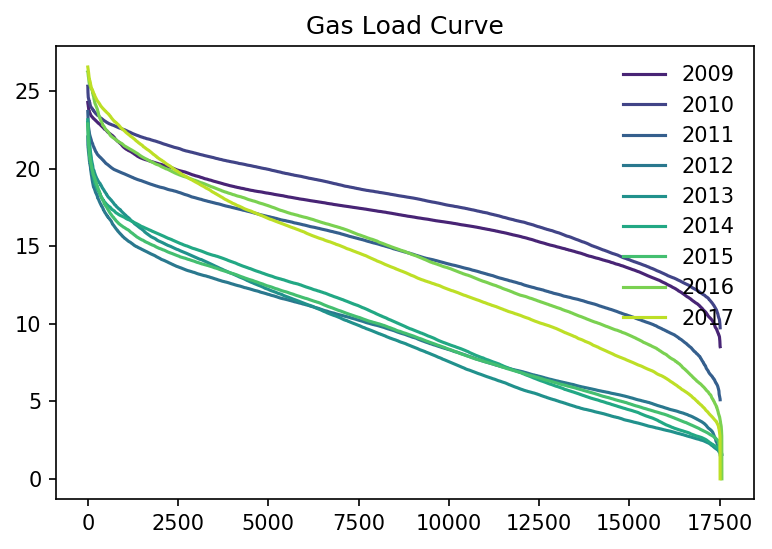

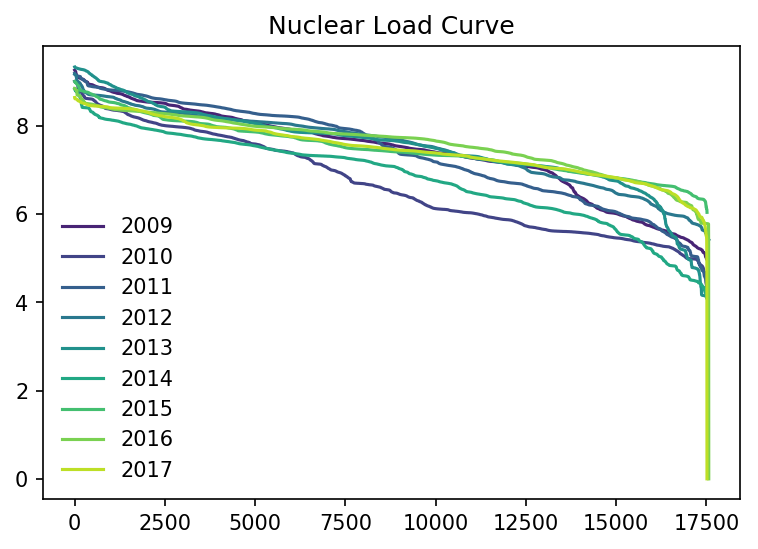

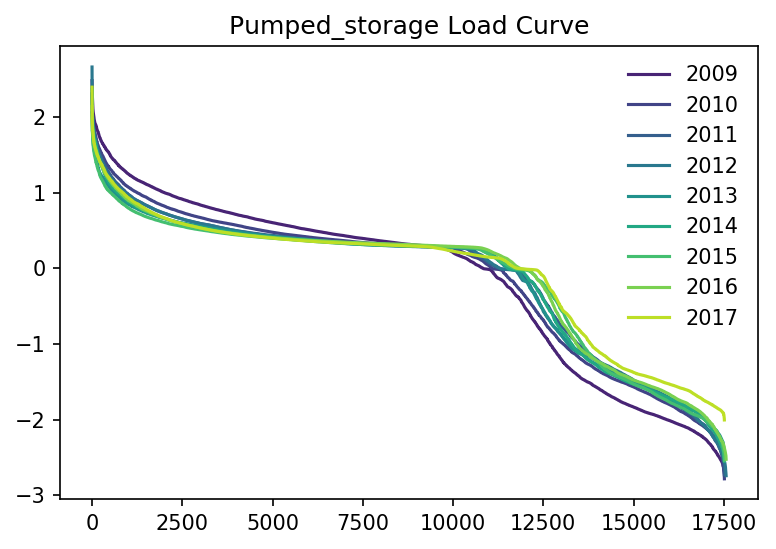

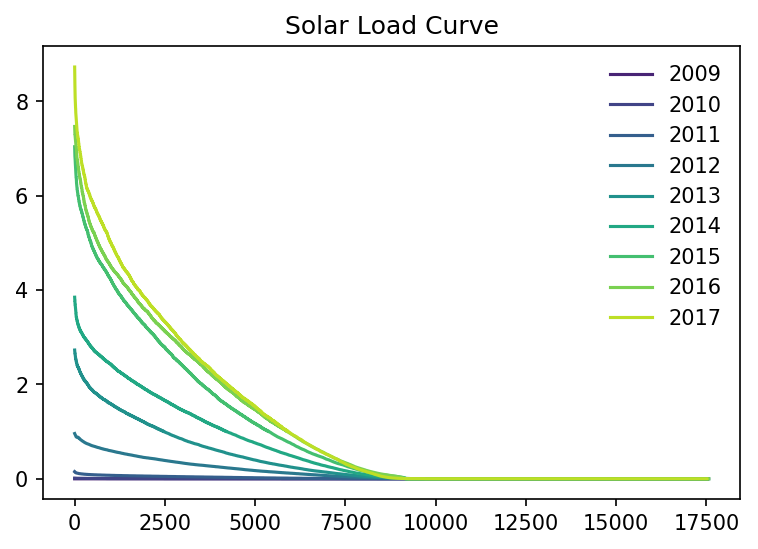

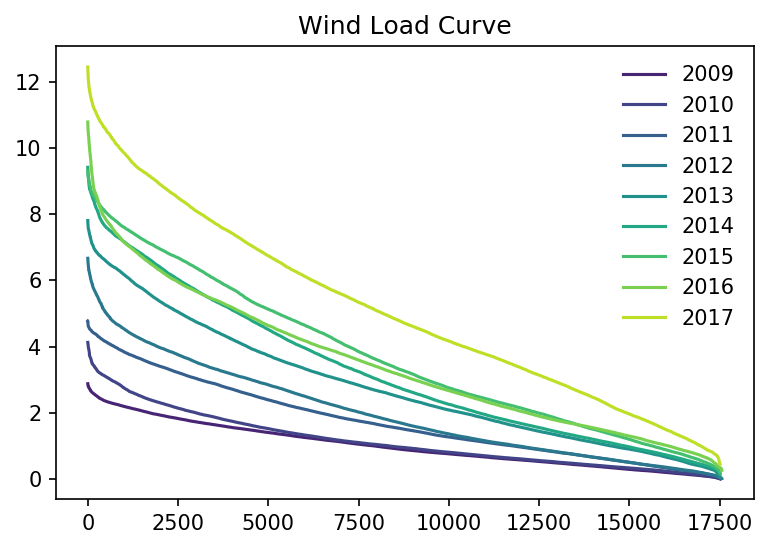

In [6]:
def plot_fuel(fuel, df_energy):
    plt.figure(dpi=150)
    for year in years:
        s_fuel = df_EI.set_index('datetime')[fuel]
        s_sorted_fuel = sort_series(s_fuel, year)
        plt.plot(s_sorted_fuel.index, s_sorted_fuel, label=f'{year}', color=cmap[year])

    plt.legend(frameon=False)
    plt.title(f'{fuel.capitalize()} Load Curve')

for fuel in fuels:
    plot_fuel(fuel, df_EI)

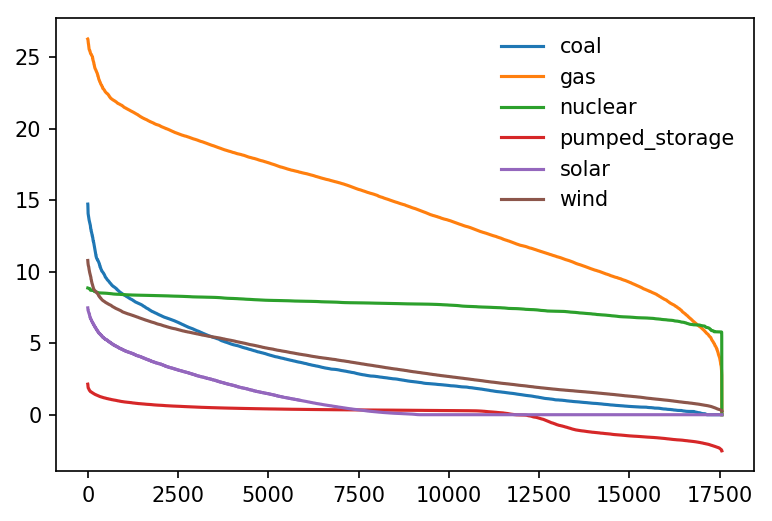

In [7]:
## Create a colormap for year fuel type, have the earlier year as a dashed line
## Could also plot this as percentage of capacity. Plot gif for last few years comparing coal and wind
## Gas is also interesting because you can see an increase in peaking

plt.figure(dpi=150)

for fuel in fuels:
    s_fuel = df_EI.set_index('datetime')[fuel]
    ## colour = 
    
    for year in [2016]:#, 2017]:
        s_sorted_fuel = sort_series(s_fuel, year)
        plt.plot(s_sorted_fuel.index, s_sorted_fuel, label=f'{fuel}')
    
plt.legend(frameon=False)